# Aerolínea: Mejor lugar para vivir

Una aerolínea tiene las siguientes rutas desde las ciudades a las que sirve (cada par tiene servicio en ambas direcciones).

(Similar al Ejercicio 2.3 de los Ejercicios 1.1)

In [1]:
routemap =  [('St. Louis', 'Miami'), 
             ('St. Louis', 'San Diego'), 
             ('St. Louis', 'Chicago'), 
             ('San Diego', 'Chicago'), 
             ('San Diego', 'San Francisco'), 
             ('San Diego', 'Minneapolis'), 
             ('San Diego', 'Boston'), 
             ('San Diego', 'Portland'), 
             ('San Diego', 'Seattle'), 
             ('Tulsa', 'New York'), 
             ('Tulsa', 'Dallas'), 
             ('Phoenix', 'Cleveland'), 
             ('Phoenix', 'Denver'), 
             ('Phoenix', 'Dallas'), 
             ('Chicago', 'New York'), 
             ('Chicago', 'Los Angeles'), 
             ('Miami', 'New York'), 
             ('Miami', 'Philadelphia'), 
             ('Miami', 'Denver'), 
             ('Boston', 'Atlanta'), 
             ('Dallas', 'Cleveland'), 
             ('Dallas', 'Albuquerque'), 
             ('Philadelphia', 'Atlanta'), 
             ('Denver', 'Minneapolis'), 
             ('Denver', 'Cleveland'), 
             ('Albuquerque', 'Atlanta'), 
             ('Minneapolis', 'Portland'), 
             ('Los Angeles', 'Seattle'), 
             ('San Francisco', 'Portland'), 
             ('San Francisco', 'Seattle'), 
             ('San Francisco', 'Cleveland'), 
             ('Seattle', 'Portland')]

In [4]:
import matplotlib.pyplot as plt
from operator import itemgetter, attrgetter, methodcaller
import operator
import os
from numpy import random, asarray, linspace, corrcoef
from colorsys import hsv_to_rgb
from sklearn import datasets
import networkx as nx
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import itertools
import random
from geopy.distance import vincenty
from geopy.geocoders import Nominatim

%matplotlib inline

In [1]:
A = nx.Graph()
A.add_edges_from(routemap)
nx.draw_circular(A)

NameError: name 'nx' is not defined

Como argumento de la función NetGet se ingresa el número de Paper iniciales, el número medio de citaciones, y una varianza de 1.

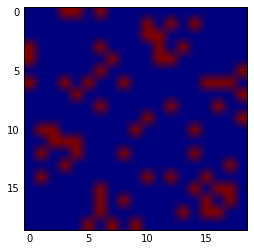

In [4]:
MA = nx.adjacency_matrix(A)

plt.imshow(MA.todense())

Se define la función de "Crecimiento" de la Red:

+ Calcule la distancia entre cada par de ciudades, añada esa distancia como pesos de la red.

Imprima la nueva red con pesos

In [6]:
def dista(A, lat, lon):

    d = vincenty((lat[A[0]], lon[A[0]]), (lat[A[1]], lon[A[1]])).kilometers

    return d

In [7]:
uni = np.unique(routemap)
lat = np.zeros(len(uni))
lon = np.zeros(len(uni))
latd = {}
lond = {}
geolocator = Nominatim()
for i in range(len(uni)):
    temp = geolocator.geocode(uni[i], timeout=100000000000)
    latd[uni[i]] = temp.latitude
    lond[uni[i]] = temp.longitude
    lat[i] = temp.latitude
    lon[i] = temp.longitude

In [8]:
ss = len(routemap)
pos = np.zeros((ss, 2))
for i in range(ss):
    pos[i][0] = list(uni).index(routemap[i][0])
    pos[i][1] = list(uni).index(routemap[i][1])

In [9]:
w = np.zeros(ss)
dic = {}

for i in range(ss):
    w[i] = dista(pos[i], lat, lon)
    t1 = pos[i][1]
w = (w-min(w))/(max(w)-min(w))
w *=10

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [10]:
B = nx.Graph()
for i in range(ss):
    B.add_edge(routemap[i][0], routemap[i][1], weight=w[i])

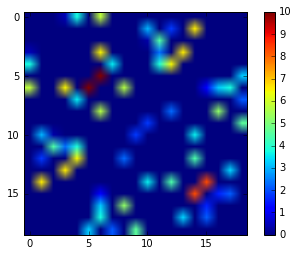

In [11]:
MB = nx.adjacency_matrix(B)
plt.imshow(MB.todense())
plt.colorbar()

In [12]:
ed = []
for i in range(10):
    da = [(u,v) for (u,v,d) in B.edges(data=True) if (i < d['weight'] <= (i+1))]
    ed.append(da)

In [13]:
poss = nx.circular_layout(B) # positions for all nodes

for i in range(len(uni)):
    poss[uni[i]] = np.array((lond[uni[i]], latd[uni[i]]))
    
col = ['#0076fb', '#006ae1', '#005ec8', '#0052af', '#004696', '#003b7d', '#002f64', '#00234b', '#001732', '#000b19']

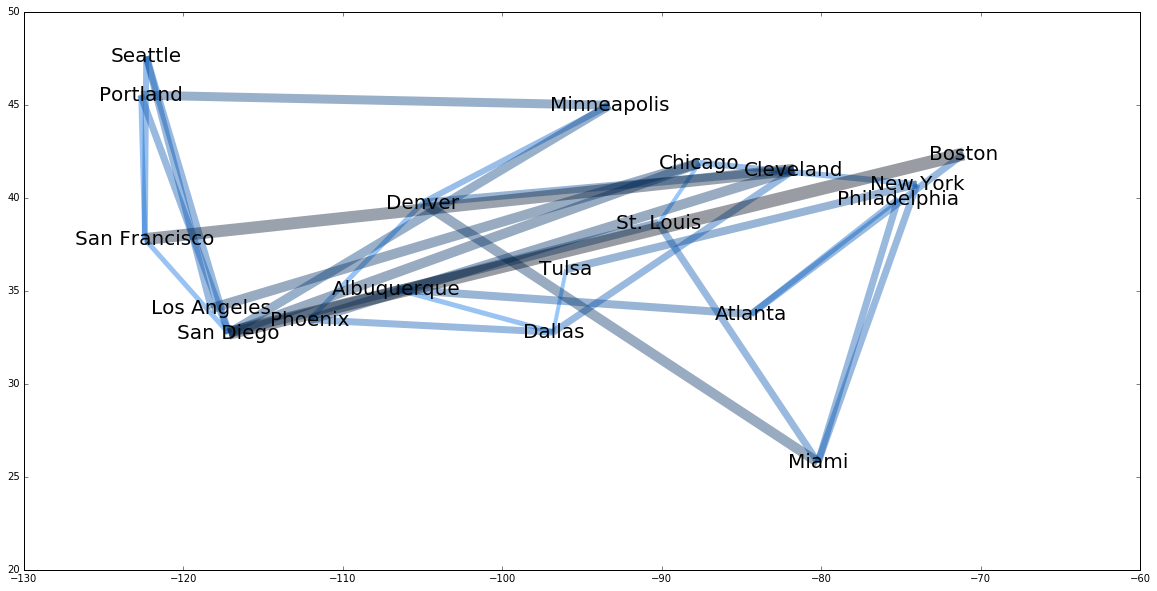

In [14]:
plt.figure(3, (20,10))
nx.draw_networkx_nodes(B,poss,node_size=200, node_color='white', node_shape=None)
nx.draw_networkx_labels(B,poss,font_size=20,font_family='sans-serif')

for i in range(10):
    nx.draw_networkx_edges(B, poss,edgelist=ed[i],
                    width=(i+4), alpha=0.4,edge_color=col[i])

El nodo escogido corresponde a Miami, sin embargo, puede notarse en el resultado anterior que la segunda opción corresponde a San Diego, como lo indica 

+ Cuál es el máximo número de intercambios que tendría que hacer un pasajero en un solo viaje entre dos ciudades servidas? (suponiendo rutas óptimas)

In [15]:
for i in range(ss):
    w[i] = dista(pos[i], lat, lon)
    t1 = pos[i][1]
B1 = nx.Graph()
for i in range(ss):
    B1.add_edge(routemap[i][0], routemap[i][1], weight=w[i])

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


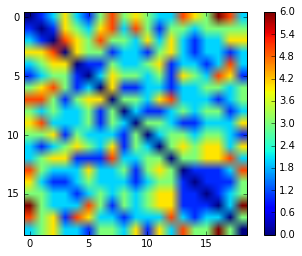

In [16]:
short = nx.all_pairs_dijkstra_path(B1)
dists = nx.all_pairs_dijkstra_path_length(B1)

Intercambios = np.zeros((len(uni),len(uni)))
for i in range(len(uni)):
    for j in range(len(uni)):
        if i == j:
            Intercambios[i][j] = 0
        else:
            Intercambios[i][j] = len(short[uni[i]][uni[j]])-1

plt.imshow(Intercambios, interpolation=None)
plt.colorbar()

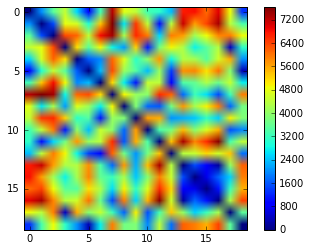

In [17]:
dists
Distancess = np.zeros((len(uni),len(uni)))
for i in range(len(uni)):
    for j in range(len(uni)):
        if i == j:
            Distancess[i][j] = 0
        else:
            Distancess[i][j] = dists[uni[i]][uni[j]]
Distancess

plt.imshow(Distancess, interpolation=None)
plt.colorbar()

In [18]:
print 'El numero maximo de intercambios es: ', Intercambios.max()

El numero maximo de intercambios es:  6.0


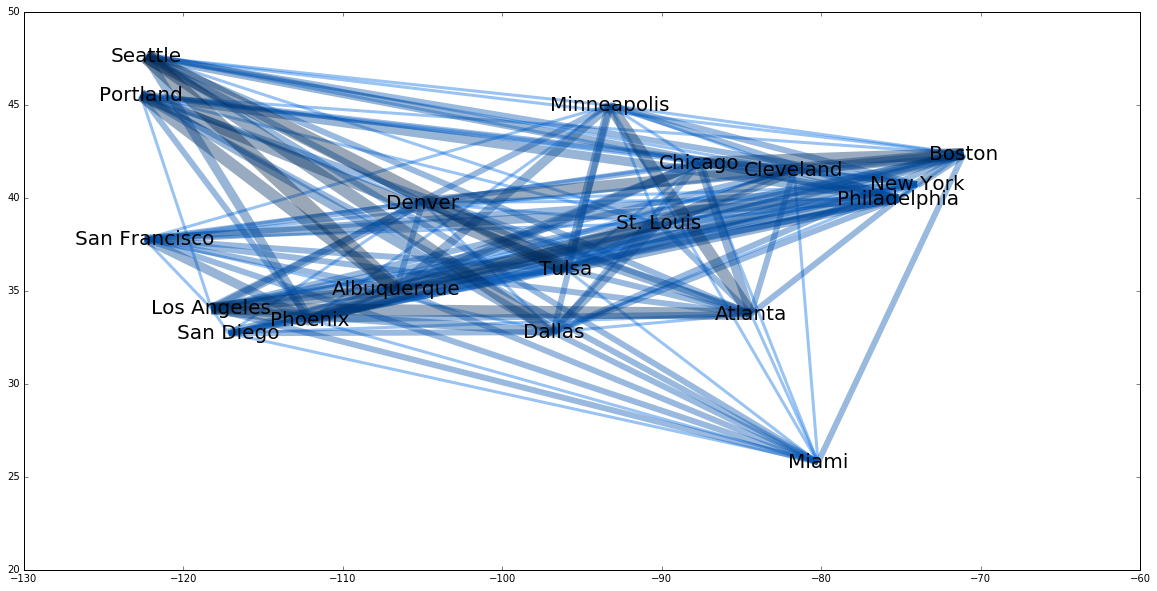

In [19]:
B2 = nx.Graph()

for i in range(len(uni)):
    for j in range(len(uni)):
        B2.add_edge(uni[i], uni[j], weight=Intercambios[i][j])

ed2 = []
for i in range(6):
    da = [(u,v) for (u,v,d) in B2.edges(data=True) if (i < d['weight'] <= (i+1))]
    ed2.append(da)
    
plt.figure(3, (20,10))
nx.draw_networkx_nodes(B2, poss,node_size=200, node_color='white', node_shape=None)
nx.draw_networkx_labels(B2, poss,font_size=20,font_family='sans-serif')

for i in range(6):
    nx.draw_networkx_edges(B2, poss,edgelist=ed2[i],
                    width=(i*3), alpha=0.4,edge_color=col[int(i*1.5)])

+ Si usted necesitara viajar mucho en esta aerolínea, cual sería el lugar óptimo para vivir? (i.e. minimizar el tiempo de viaje para llegar a cualquier ciudad. Asuma que el tiempo entre intercambios es de 1 hora y que los aviones viajan a 500 km/hora)

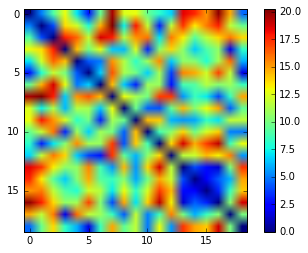

In [20]:
Vel = 500.0
Int = 1.0

Tiempo = Int*Intercambios +  Distancess/Vel

plt.imshow(Tiempo, interpolation=None)
plt.colorbar()

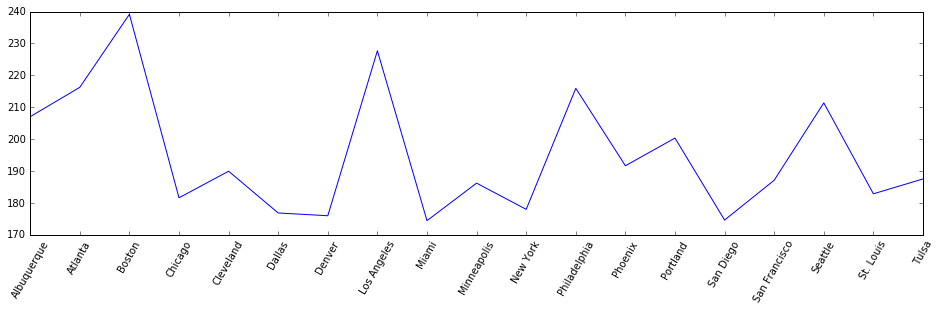

In [21]:
plt.figure(5, (16,4))
plt.plot(range(len(uni)),Tiempo.sum(axis=0))
a = plt.xticks(range(len(uni)), uni, rotation=60)

In [22]:
print 'La ciudad que seria el lugar optimo para vivir es:  ', uni[np.argmin(Tiempo.sum(axis=0))]

La ciudad que seria el lugar optimo para vivir es:   Miami


In [23]:
data = [ ]
ti = Tiempo.sum(axis=0)[:]
for i in range(len(uni)):
    data.append((uni[i], ti[i]))

sortd = sorted(data, key=itemgetter(1))
print 'El orden de prioridad para la seleccion es: '
for i in range(len(uni)):
    print sortd[i][0]

El orden de prioridad para la seleccion es: 
Miami
San Diego
Denver
Dallas
New York
Chicago
St. Louis
Minneapolis
San Francisco
Tulsa
Cleveland
Phoenix
Portland
Albuquerque
Seattle
Philadelphia
Atlanta
Los Angeles
Boston


+ Calcule diferentes medidas de centralidad. Es el nodo que escogió para vivir el más importante según estas medidas? Explique

Se crea la función del grupo de papers iniciales:

In [25]:
DC = nx.degree_centrality(B1)
EC = nx.eigenvector_centrality(B1)
BC = nx.betweenness_centrality(B1)
CC = nx.closeness_centrality(B1)
CC2 = nx.communicability_centrality_exp(B1)
print 'La ciudad con mayor Degree Centrality es:  ', max(DC.iteritems(), key=operator.itemgetter(1))[0]
print 'La ciudad con mayor Eigenvector Centrality es:  ', max(EC.iteritems(), key=operator.itemgetter(1))[0]
print 'La ciudad con mayor Betweeness Centrality es:  ', max(BC.iteritems(), key=operator.itemgetter(1))[0]
print 'La ciudad con mayor Closeness Centrality es:  ', max(CC.iteritems(), key=operator.itemgetter(1))[0]
print 'La ciudad con mayor Communicability Centrality es:  ', max(CC2.iteritems(), key=operator.itemgetter(1))[0]

La ciudad con mayor Degree Centrality es:   San Diego
La ciudad con mayor Eigenvector Centrality es:   San Diego
La ciudad con mayor Betweeness Centrality es:   San Diego
La ciudad con mayor Closeness Centrality es:   San Diego
La ciudad con mayor Communicability Centrality es:   San Diego


El nodo escogido corresponde a Miami, sin embargo, puede notarse en el resultado anterior que la segunda opción corresponde a San Diego, puede notarse que la magnitud de SanDiego es similar a la magnitud de Miami, y es esto es acorde a lo encontrado con las diferentes medidas de centralidad.  La selección de miami se ve afectada por el número de intercambios, sin embargo la medidas de centralidad se enfocan en encontrar la importancia de un nodo en la Red. 

# Modelos Generativos

__Simulación de Red de Citaciones__ (Similar al Ejercicio 1.2.1 de los Ejercicios 1.4)

Con un número de papers _N = 1000_. Los papers van a ser publicados en orden (primero 1, después 2, etc.) Defina el promedio de citaciones de cada paper (e.g. 3 citaciones). Cree un grupo inicial de papers. Cada nuevo paper tendrá ___c___ citaciones. Esas citaciones van a ser a papers ya existentes y proporcional al número de papers que citan a cada paper. 

+ Cree una red con estas propiedades

Se crea la función del grupo de papers iniciales:

In [2]:
def listuniq(list):
    nlist = []
    [nlist.append(item) for item in list if item not in nlist]
    return nlist


def NetGet(N, mu, sigma):

    nod = [i for i in range(N)]

    Edges = {}
    for i in range(N):
        Edges[nod[i]] = []

    for nActual in nod:
        deseados = int(abs(np.random.normal(mu, sigma, 1)) + 0.99)
        actuales = len(Edges[nActual])

        if deseados < actuales:
            restantes = 0
        else:
            restantes = deseados - actuales

        nEdg = random.sample(filter(lambda x : x != nActual, nod), restantes)


        for i in nEdg:
            Edges[nActual].append(i) ##Esto es para grafos sin direccion
            #Edges[i].append(nActual)
    for i in range(N):
        Edges[i] = listuniq(Edges[i])

    return Edges

Como argumento de la función NetGet se ingresa el número de Paper iniciales, el número medio de citaciones, y una varianza de 1.

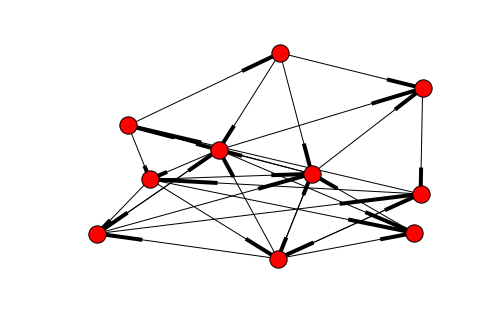

In [60]:
Ed = NetGet(10, 3, 1)

G = nx.DiGraph()

for i in Ed.iterkeys():
    for j in Ed[i]:
        G.add_edge(j, i)
plt.figure()
nx.draw(G)

Se define la función de "Crecimiento" de la Red:

In [8]:
def growNet3(Ed, N):
    Edt = Ed.copy()

    for k in range(N):
        probT = np.zeros(len(Edt.values()))

        for k, i in enumerate(Edt.values()):
            probT[k] = len(i)
        prom = sum(probT)/float(len(Edt.values()))
        probT /= sum(probT)
        nEd = int(abs(np.random.normal(prom, 1, 1))+0.99)
        nCon = np.random.choice(Edt.keys(), nEd, p=probT)

        nNod = max(Edt.keys()) + 1
        Edt[nNod] = []
        for i in nCon:
            Edt[nNod].append(i)

    return Edt

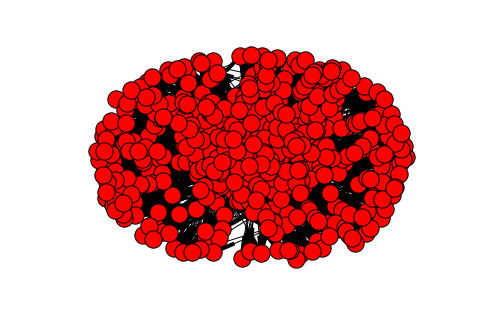

In [19]:
Ed3 = growNet3(Ed, 990)

G2 = nx.DiGraph()

for i in Ed3.iterkeys():
    for j in Ed3[i]:
        G2.add_edge(j,i)
nx.draw(G2)

+ Compare la distribución de grados de esta red con una red aleatoria con el mismo número de nodos y enlaces

Se crea una función para la creación de una red aleatoria con direccion:

In [20]:
def netgen(nn, ne):
    nod = [i for i in range(nn)]
    nEdges = ne
    temp = []
    for subset in itertools.combinations(nod, 2):
        temp.append(subset)
        temp.append((subset[1], subset[0]))
    edg = random.sample(temp, nEdges)
    return edg, nod

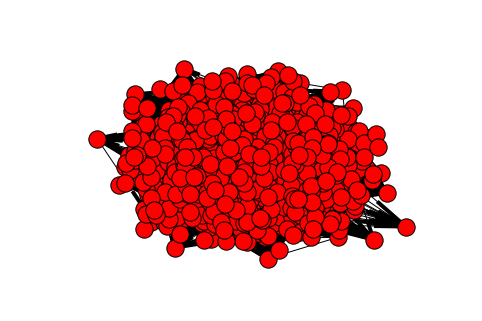

In [21]:
G3 = nx.DiGraph()
edges, nodes = netgen(1000, sum(G2.degree().values()))

G3.add_edges_from(edges)
nx.draw(G3)

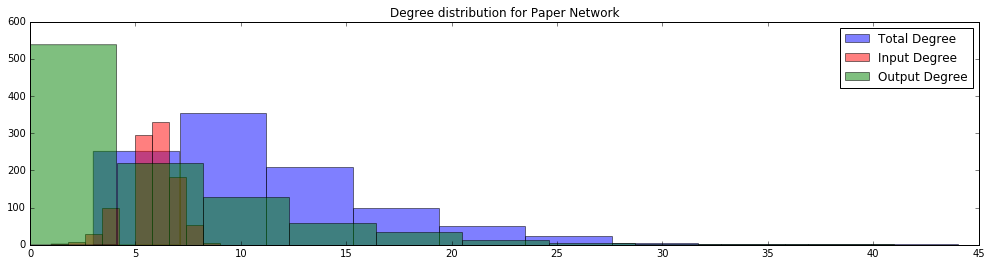

In [54]:
At = G2.degree().values()
Ai = G2.in_degree().values()
Ao = G2.out_degree().values()

plt.figure(2, (17, 4))
plt.hist(At,  facecolor='blue', alpha=0.5, label='Total Degree')
plt.hist(Ai,  facecolor='red', alpha=0.5, label='Input Degree')
plt.hist(Ao,  facecolor='green', alpha=0.5, label="Output Degree")
plt.title('Degree distribution for Paper Network')
plt.legend()

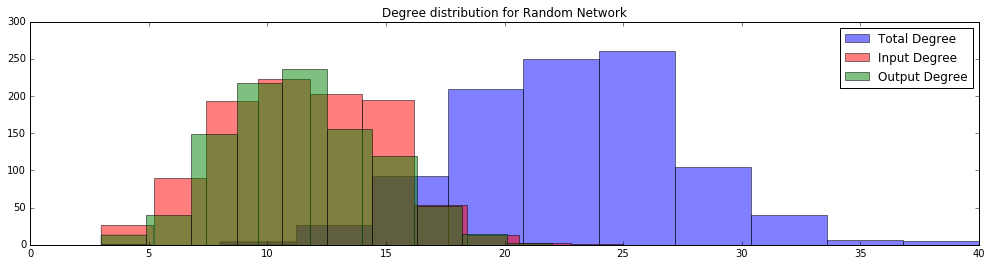

In [55]:
Bt = G3.degree().values()
Bi = G3.in_degree().values()
Bo = G3.out_degree().values()
plt.figure(3, (17, 4))

plt.hist(Bt,  facecolor='blue', alpha=0.5, label='Total Degree')
plt.hist(Bi,  facecolor='red', alpha=0.5, label='Input Degree')
plt.hist(Bo,  facecolor='green', alpha=0.5, label='Output Degree')
plt.title('Degree distribution for Random Network')
plt.legend()

+ Calcule 5 diferentes medidas de centralidad para esta red (incluyendo degree centrality, i.e. descubra los Hubs)

In [ ]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

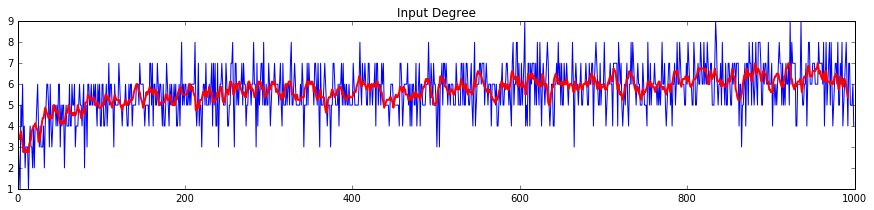

In [56]:
plt.figure(figsize=(15,3))
plt.plot(Ai)
plt.plot(moving_average(Ai, n=8), 'red', linewidth=2)
plt.title("Input Degree")

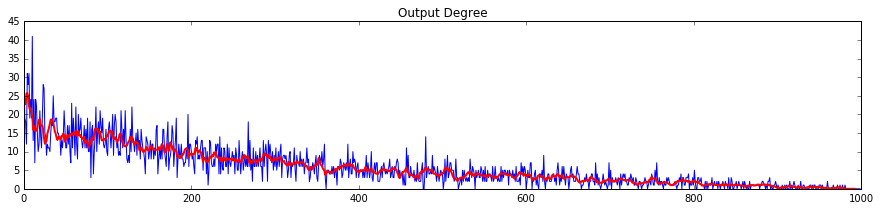

In [57]:
plt.figure(figsize=(15,3))
plt.plot(Ao)
plt.plot(moving_average(Ao, n=8), 'red', linewidth=2)
plt.title("Output Degree")

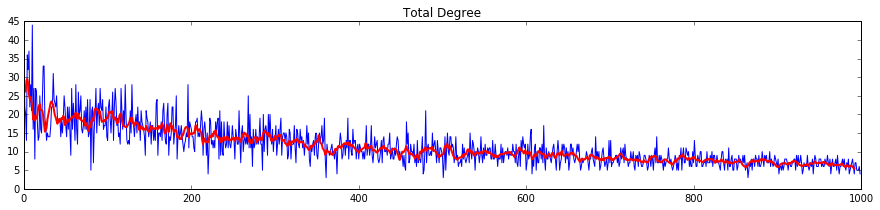

In [58]:
plt.figure(figsize=(15,3))
plt.plot(At)
plt.plot(moving_average(At, n=8), 'red', linewidth=2)
plt.title("Total Degree")

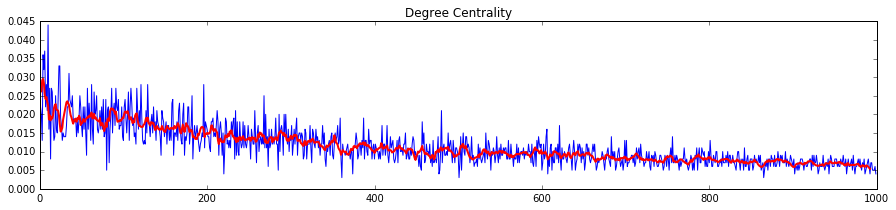

In [43]:
DC = nx.degree_centrality(G2).values()
plt.figure(figsize=(15,3))
plt.plot(DC)
plt.plot(moving_average(DC, n=8), 'red', linewidth=2)
plt.title("Degree Centrality")

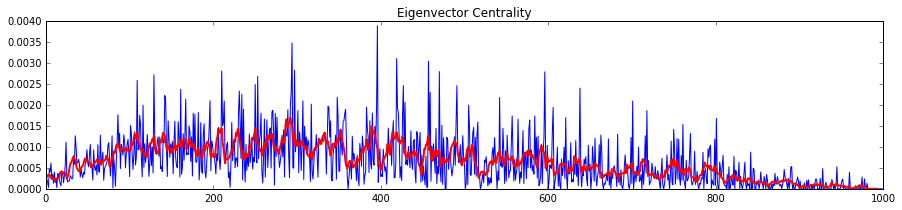

In [49]:
EC = nx.betweenness_centrality(G2).values()
plt.figure(figsize=(15, 3))
plt.plot(EC)
plt.plot(moving_average(EC, n=8), 'red', linewidth=2)
plt.title("Eigenvector Centrality")

+ Cree 10 nuevas redes con este proceso y compare cuáles son los nodos que se vuelven Hubs y tienen altos niveles de centralidad
    + Son siempre los mismos nodos los que se vuelven hubs y tienen alta centralidad?
    + Cómo estas obsrevaciones tiene relación con la vida real?

+ Cuantos componentes tiene la red? (Explique por qué)